<h1> Network analysis in Python </h1>
<p>Finding a shortest path using a specific street network is a common GIS problem that has many practical applications. For example navigators are one of those “every-day” applications where routing using specific algorithms is used to find the optimal route between two (or multiple) points.

It is also possible to perform network analysis such as tranposrtation routing in Python. Networkx is a Python module that provides tools for analyzing networks in various different ways. It also contains algorithms such as Dijkstra’s algorithm or A* algoritm that are commonly used to find shortest paths along transportation network.

To be able to conduct network analysis, it is, of course, necessary to have a network that is used for the analyses. OSMnx package that we just explored in previous tutorial, makes it really easy to retrieve routable networks from OpenStreetMap with different transport modes (walking, cycling and driving). OSMnx also combines some functionalities from networkx module to make it straightforward to conduct routing along OpenStreetMap data.

Next we will test the routing functionalities of OSMnx by finding a shortest path between two points based on drivable roads. When fetching netowrk data from OpenStreetMap using OSMnx, it is possible to define the type of street network using the network_type parameter (options: drive, walk and bike).</p>

In [1]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

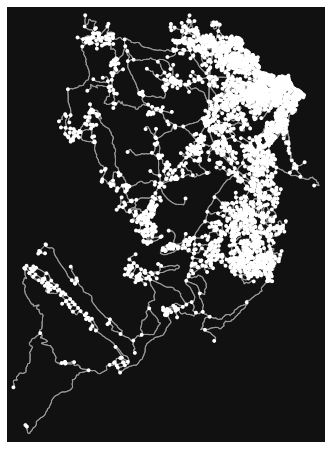

In [6]:
#Specifying type to road with "network_type".
place_name = "Defne, Hatay, Turkey"
graph = ox.graph_from_place(place_name, network_type='drive')

#Plot the graph.
fig, ax = ox.plot_graph(graph)

In [8]:
#Converting graph into a GeoDataFrame can be done with function "graph_to_gdfs()"
# Retrieve only edges from the graph
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

#Check columns
edges.columns

Index(['osmid', 'oneway', 'ref', 'name', 'highway', 'length', 'geometry',
       'lanes', 'maxspeed', 'access', 'bridge', 'junction'],
      dtype='object')

In [9]:
#Check crs
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
#Shows atribute of the GeoDataFrame
edges.head()

osmid  oneway   ref              name  \
u         v          key                                              
158756513 2234554704 0    336633427    True  D420  Samandağ Caddesi   
          2234316618 0    213793443   False   NaN               NaN   
158756514 2234554993 0    213825490   False   NaN               NaN   
          2234555128 0    336633427    True  D420  Samandağ Caddesi   
158756520 2234412741 0    213825537   False   NaN               NaN   

                              highway   length  \
u         v          key                         
158756513 2234554704 0          trunk   47.602   
          2234316618 0    residential  163.486   
158756514 2234554993 0    residential   75.746   
          2234555128 0          trunk   44.444   
158756520 2234412741 0    residential  136.619   

                                                                   geometry  \
u         v          key                                                      
158756513 2234554704 0    LINESTRING (36.12264 36.18667, 36.12291 36.18704)   
          2234316618 0    LINESTRING (36.12264 36.18667, 36.12266 36.186...   
158756514 2234554993 0    LINESTRING (36.12633 36.19003, 36.12662 36.18939)   
          2234555128 0    LINESTRING (36.12633 36.19003, 36.12645 36.190...   
158756520 2234412741 0    LINESTRING (36.14034 36.19376, 36.14095 36.193...   

                         lanes maxspeed access bridge junction  
u         v          key                                        
158756513 2234554704 0     NaN      NaN    NaN    NaN      NaN  
          2234316618 0     NaN      NaN    NaN    NaN      NaN  
158756514 2234554993 0     NaN      NaN    NaN    NaN      NaN  
          2234555128 0     NaN      NaN    NaN    NaN      NaN  
158756520 2234412741 0     NaN      NaN    NaN    NaN      NaN

In [12]:
#Shows the features of the columns. 
print(edges['highway'].value_counts())

residential                              6819
tertiary                                  947
secondary                                 270
trunk                                     182
unclassified                              162
living_street                             150
primary                                   128
trunk_link                                 43
[residential, unclassified]                10
[tertiary, residential]                     8
road                                        6
[residential, living_street]                6
[tertiary, residential, unclassified]       2
[primary, trunk]                            2
primary_link                                2
[tertiary, unclassified]                    2
[primary, secondary]                        1
Name: highway, dtype: int64


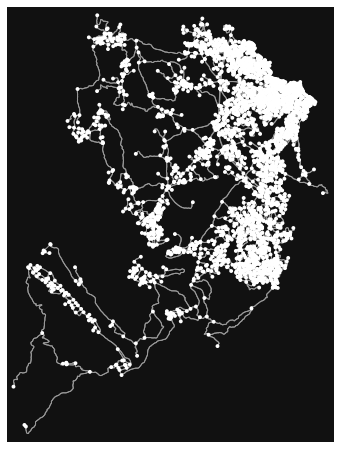

In [16]:
#Re-project WGS84 to UTM "Latitudes, Longitudes"
graph_proj = ox.project_graph(graph)

#Draw the graph with UTM coordinate system.
fig, ax = ox.plot_graph(graph_proj)

In [17]:
# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

print("Coordinate system:", edges_proj.crs)
edges_proj.head()

Coordinate system: +proj=utm +zone=37 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


osmid  oneway   ref              name  \
u          v          key                                              
158756513  2234554704 0    336633427    True  D420  Samandağ Caddesi   
           2234316618 0    213793443   False   NaN               NaN   
2234554704 4163813091 0    213825465   False   NaN               NaN   
           2234554759 0    336633427    True  D420  Samandağ Caddesi   
2234316618 158756513  0    213793443   False   NaN               NaN   

                               highway   length  \
u          v          key                         
158756513  2234554704 0          trunk   47.602   
           2234316618 0    residential  163.486   
2234554704 4163813091 0    residential    4.432   
           2234554759 0          trunk   88.127   
2234316618 158756513  0    residential  163.486   

                                                                    geometry  \
u          v          key                                                      
158756513  2234554704 0    LINESTRING (241249.280 4008491.613, 241274.850...   
           2234316618 0    LINESTRING (241249.280 4008491.613, 241251.724...   
2234554704 4163813091 0    LINESTRING (241274.850 4008531.734, 241271.998...   
           2234554759 0    LINESTRING (241274.850 4008531.734, 241329.205...   
2234316618 158756513  0    LINESTRING (241357.153 4008368.724, 241251.724...   

                          lanes maxspeed bridge access junction  
u          v          key                                        
158756513  2234554704 0     NaN      NaN    NaN    NaN      NaN  
           2234316618 0     NaN      NaN    NaN    NaN      NaN  
2234554704 4163813091 0     NaN      NaN    NaN    NaN      NaN  
           2234554759 0     NaN      NaN    NaN    NaN      NaN  
2234316618 158756513  0     NaN      NaN    NaN    NaN      NaN

In [18]:
#Check the epsg code of this projection
from pyproj import CRS
CRS(edges_proj.crs).to_epsg()

32637

In [19]:
# Calculate network statistics
stats = ox.basic_stats(graph_proj, circuity_dist='euclidean')
stats

{'n': 3420,
 'm': 8740,
 'k_avg': 5.111111111111111,
 'intersection_count': 2772,
 'streets_per_node_avg': 2.701169590643275,
 'streets_per_node_counts': {0: 0, 1: 648, 2: 0, 3: 2505, 4: 260, 5: 7},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.18947368421052632,
  2: 0.0,
  3: 0.7324561403508771,
  4: 0.07602339181286549,
  5: 0.0020467836257309943},
 'edge_length_total': 1084266.8149999995,
 'edge_length_avg': 124.05798798626996,
 'street_length_total': 570614.6400000005,
 'street_length_avg': 124.75177962396162,
 'street_segments_count': 4574,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0914716848582273,
 'self_loop_proportion': 0.0004576659038901602,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

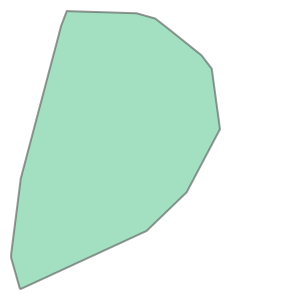

In [20]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull
# Show output
convex_hull

In [21]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, cc=True)

# Add extened statistics to the basic statistics
for key, value in extended_stats.items():
    stats[key] = value

# Convert the dictionary to a Pandas series for a nicer output
pd.Series(stats)

n                                                                                   3420
m                                                                                   8740
k_avg                                                                            5.11111
intersection_count                                                                  2772
streets_per_node_avg                                                             2.70117
streets_per_node_counts                      {0: 0, 1: 648, 2: 0, 3: 2505, 4: 260, 5: 7}
streets_per_node_proportion            {0: 0.0, 1: 0.18947368421052632, 2: 0.0, 3: 0....
edge_length_total                                                            1.08427e+06
edge_length_avg                                                                  124.058
street_length_total                                                               570615
street_length_avg                                                                124.752
street_segments_count

In [22]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull

# Centroid
centroid = convex_hull.centroid

# Show
print(centroid)

POINT (238876.3812146453 4005002.232655775)


In [23]:
nodes_proj.head()

,y,x,street_count,lon,lat,geometry
osmid,,,,,,
158756513,4.008492e+06,241249.279918,3,36.122635,36.186674,POINT (241249.280 4008491.613)
2234554704,4.008532e+06,241274.850184,3,36.122906,36.187042,POINT (241274.850 4008531.734)
2234316618,4.008369e+06,241357.153048,1,36.123874,36.185597,POINT (241357.153 4008368.724)
158756514,4.008855e+06,241593.059854,3,36.126334,36.190034,POINT (241593.060 4008854.517)
2234554993,4.008782e+06,241616.203986,1,36.126615,36.189391,POINT (241616.204 4008782.488)


In [24]:
# Get the x coordinates of the nodes
nodes_proj['x'] = nodes_proj["x"].astype(float)

# Retrieve the maximum x value (i.e. the most eastern)
maxx = nodes_proj['x'].max()
print(maxx)

244995.62200068965


In [25]:
# Retrieve the node that is the most eastern one and get the Shapely Point geometry out of it
target = nodes_proj.loc[nodes_proj['x']==maxx, 'geometry'].values[0]
print(target)

POINT (244995.6220006896 4005600.135821546)


In [26]:
# Get origin x and y coordinates
orig_xy = (centroid.y, centroid.x)

# Get target x and y coordinates
target_xy = (target.y, target.x)

In [27]:
# Find the node in the graph that is closest to the origin point (here, we want to get the node id)
orig_node = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')
orig_node

7001816047

In [28]:
# Find the node in the graph that is closest to the target point (here, we want to get the node id)
target_node = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')
target_node

2917491989

In [31]:
# Retrieve the rows from the nodes GeoDataFrame
o_closest = nodes_proj.loc[orig_node]
t_closest = nodes_proj.loc[target_node]

# Create a GeoDataFrame from the origin and target points
od_nodes = gpd.GeoDataFrame([o_closest, t_closest], geometry='geometry', crs=nodes_proj.crs)
od_nodes.head()

,y,x,street_count,lon,lat,geometry
7001816047,4.005027e+06,238906.997572,1,36.097770,36.154854,POINT (238906.998 4005027.385)
2917491989,4.005600e+06,244995.622001,1,36.165188,36.161632,POINT (244995.622 4005600.136)


In [32]:
# Calculate the shortest path
route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')

# Show what we have
print(route)

[7001816047, 7001184646, 7001184631, 7001184633, 7001184635, 7001184664, 1179485901, 1179487285, 7001780055, 1179486603, 3436799370, 1179490839, 3436799470, 3436800014, 1179485666, 1179488311, 3436800351, 3436800320, 2270208697, 2270208693, 2270208719, 2270208708, 2234316389, 2234316372, 3706563345, 3706563349, 2234316243, 2234316101, 1179046570, 1179043147, 1179139254, 1179043200, 2234968571, 2234968625, 2234968609, 2234968615, 2234968647, 2234968638, 2234968644, 2234968675, 2234968699, 2234968663, 2234968632, 2917474675, 2917474665, 2917491989]


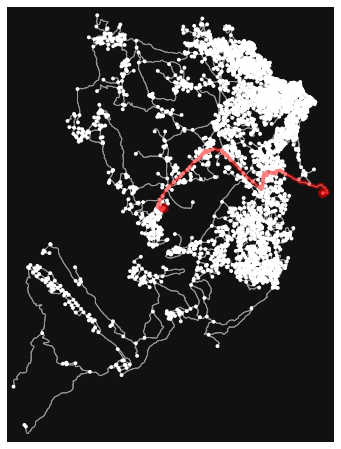

In [35]:
#Plot the shortest path
fig, ax = ox.plot_graph_route(graph_proj, route)

In [36]:
# Get the nodes along the shortest path
route_nodes = nodes_proj.loc[route]
route_nodes

,y,x,street_count,lon,lat,geometry
osmid,,,,,,
7001816047,4.005027e+06,238906.997572,1,36.097770,36.154854,POINT (238906.998 4005027.385)
7001184646,4.004956e+06,238843.420915,3,36.097088,36.154192,POINT (238843.421 4004955.787)
7001184631,4.005018e+06,238755.524195,4,36.096091,36.154729,POINT (238755.524 4005018.101)
7001184633,4.005078e+06,238668.283843,3,36.095103,36.155244,POINT (238668.284 4005077.931)
7001184635,4.005184e+06,238703.704472,3,36.095461,36.156209,POINT (238703.704 4005184.055)
7001184664,4.005490e+06,238866.630624,3,36.097168,36.159012,POINT (238866.631 4005490.437)
1179485901,4.005723e+06,239010.929363,3,36.098693,36.161145,POINT (239010.929 4005722.980)
1179487285,4.005807e+06,239077.879199,3,36.099408,36.161919,POINT (239077.879 4005807.005)
7001780055,4.005822e+06,239093.518278,3,36.099577,36.162061,POINT (239093.518 4005822.230)


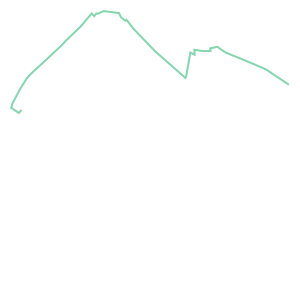

In [37]:
from shapely.geometry import LineString, Point

# Create a geometry for the shortest path
route_line = LineString(list(route_nodes.geometry.values))
route_line

In [39]:
# Create a GeoDataFrame
route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges_proj.crs, columns=['geometry'])

In [50]:
# Retrieve buildings and reproject
buildings = ox.geometries_from_place(place_name, tags={'building':True})
buildings_proj = buildings.to_crs(crs=edges_proj.crs)

C:\Users\umutb\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\umutb\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


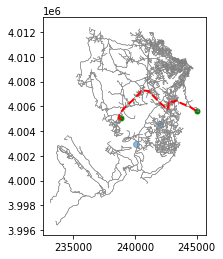

In [52]:
# Plot edges and nodes
ax = edges_proj.plot(linewidth=0.5, color='gray')
ax = nodes_proj.plot(ax=ax, markersize=0, color='gray')

# Add buildings
ax = buildings_proj.plot(ax=ax, facecolor='black', alpha=0.5)

# Add the route
ax = route_geom.plot(ax=ax, linewidth=2, linestyle='--', color='red')

# Add the origin and destination nodes of the route
ax = od_nodes.plot(ax=ax, markersize=24, color='green')